In [173]:
import pandas as pd

df = pd.read_csv('./data/lfw/human_balance.txt', 
                 sep=' ',
                 skiprows=1, 
                 names=['path', 'amount'])
df['name'] = df.path.str.split('\\').str[-1].str.replace('_', ' ')

df.head()

,path,amount,name
0,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,1,Aaron Eckhart
1,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,1,Aaron Guiel
2,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,1,Aaron Patterson
3,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,4,Aaron Peirsol
4,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,1,Aaron Pena


In [174]:
df.describe()

,amount
count,5749.000000
mean,2.301792
std,9.016410
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,530.000000


In [175]:
df_sorted = df.sort_values('amount', axis=0, ascending=False).reset_index(drop=True)
df_sorted.head(20)

,path,amount,name
0,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,530,George W Bush
1,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,236,Colin Powell
2,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,144,Tony Blair
3,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,121,Donald Rumsfeld
4,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,109,Gerhard Schroeder
5,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,77,Ariel Sharon
6,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,71,Hugo Chavez
7,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,60,Junichiro Koizumi
8,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,55,Jean Chretien
9,C:\Users\grzeg\hub\udacity_dog_breed\data\lfw\...,53,John Ashcroft


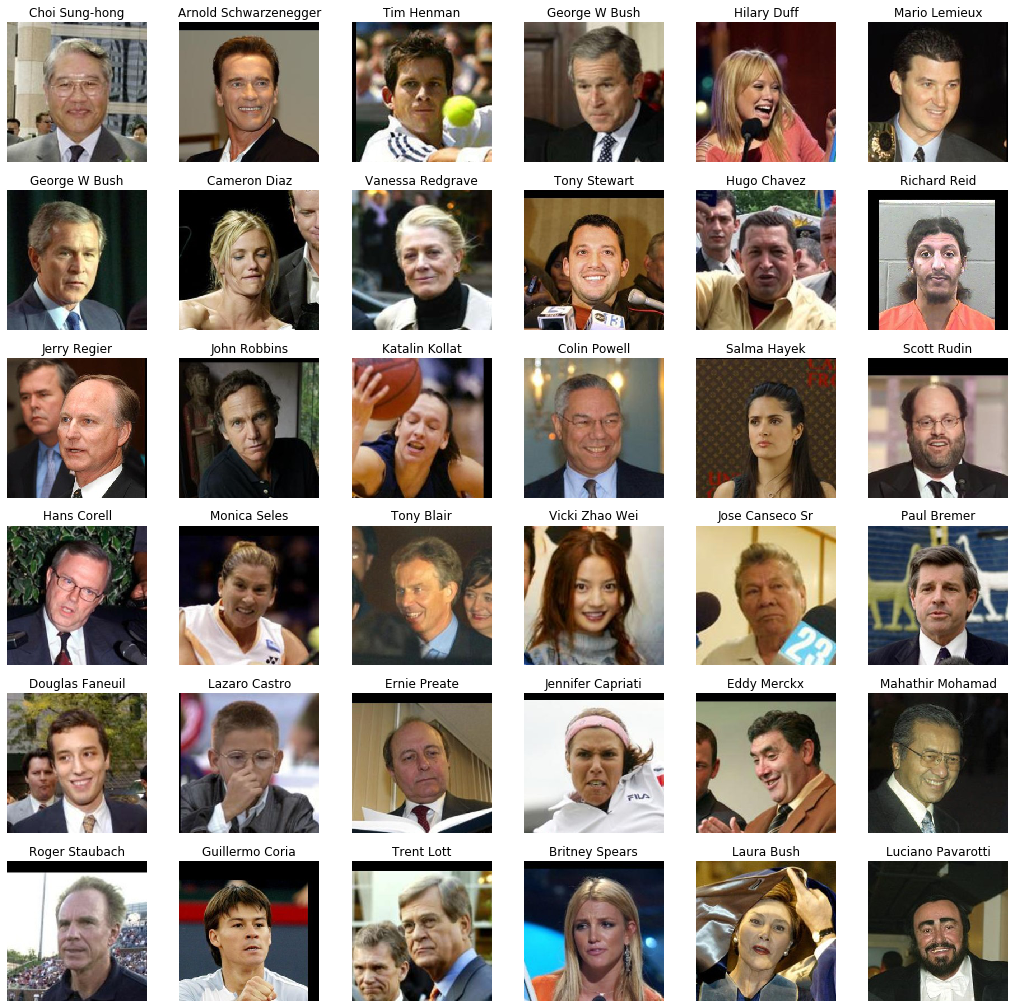

In [176]:
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# load filenames for human and dog images
human_files = np.array(glob("./data/lfw/*/*"))         # Remove the dot ./ on the udacity workspace
dog_files = np.array(glob("./data/dog_images/*/*/*"))


n = 36
d = int(n**.5)
np.random.seed(41)
idx_human = np.random.randint(0, len(human_files), (1, n))
idx_dog = np.random.randint(0, len(dog_files), (1, n))

_, ax = plt.subplots(d, d, figsize=(18,18))
for idx, ax in enumerate(ax.flat):
    img = Image.open(human_files[idx_human][0][idx])
    name = human_files[idx_human][0][idx].split('\\')[-1][:-9].replace('_', ' ')
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(name)


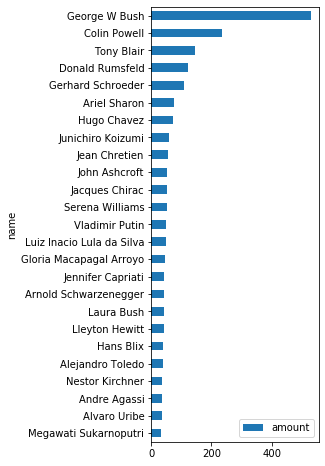

In [177]:
topdown = 25
df_sorted.head(topdown).sort_values('amount').plot(x='name', y='amount', kind='barh', figsize=(3,8));

In [178]:
df_sorted[['name', 'amount']][df_sorted['amount'] == 1]

,name,amount
1680,Nastia Liukin,1
1681,Noel Forgeard,1
1682,Olene Walker,1
1683,Noer Muis,1
1684,Norman Mailer,1
...,...,...
5744,Ira Einhorn,1
5745,Iran Brown,1
5746,Ion Tiriac,1
5747,Ion Iliescu,1


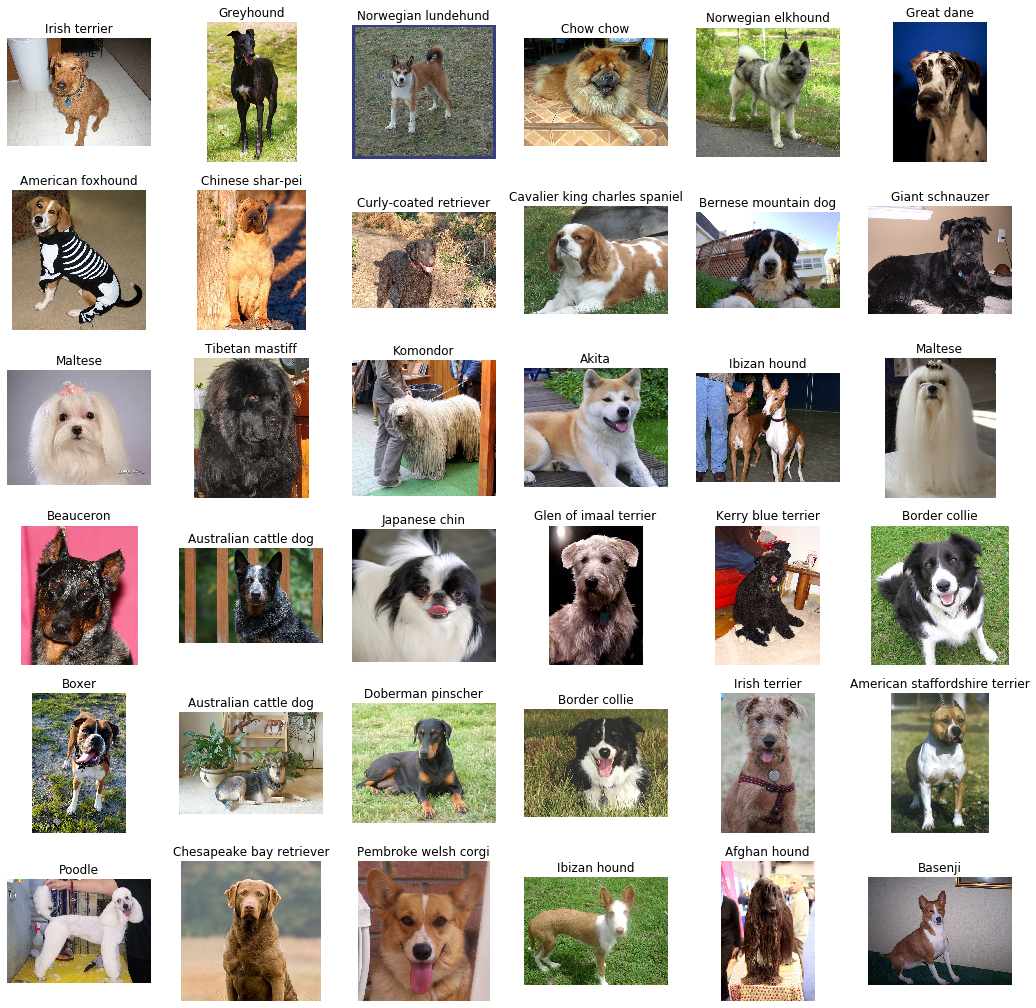

In [179]:
_, ax = plt.subplots(d, d, figsize=(18,18))
for idx, ax in enumerate(ax.flat):
    img = Image.open(dog_files[idx_dog][0][idx])
    name = dog_files[idx_dog][0][idx].split('\\')[-1][:-10].replace('_', ' ')
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(name)

In [190]:
dog_test_files = np.array(glob("./data/dog_images/test/*/*"))
dog_train_files = np.array(glob("./data/dog_images/train/*/*"))
dog_valid_files = np.array(glob("./data/dog_images/valid/*/*"))

def group_breed(dog_files, col_name='amount', col_split=2):
    df_dog = pd.DataFrame(data=dog_files, columns=['path'])
    df_dog['breed'] = df_dog.path.str.split('\\').str[col_split].str[4:].str.replace('_', ' ')
    df_dog.breed = df_dog.breed.astype('category')

    dog_grouped = df_dog.groupby('breed').count()
    dog_grouped = dog_grouped.rename(columns={'path': col_name})
    return dog_grouped

dog_grouped = group_breed(dog_files, col_name='sum', col_split=2)
dog_train = group_breed(dog_train_files, col_name='train', col_split=1)
dog_test = group_breed(dog_test_files, col_name='test', col_split=1)
dog_valid = group_breed(dog_valid_files, col_name='valid', col_split=1)

dog_grouped = pd.concat([dog_train, dog_test, dog_valid, dog_grouped], axis=1)
dog_grouped.describe()

,train,test,valid,sum
count,133.000000,133.000000,133.000000,133.000000
mean,50.225564,6.285714,6.278195,62.789474
std,11.863885,1.712571,1.350384,14.852330
min,26.000000,3.000000,4.000000,33.000000
25%,42.000000,5.000000,6.000000,53.000000
50%,50.000000,6.000000,6.000000,62.000000
75%,61.000000,8.000000,7.000000,76.000000
max,77.000000,10.000000,9.000000,96.000000


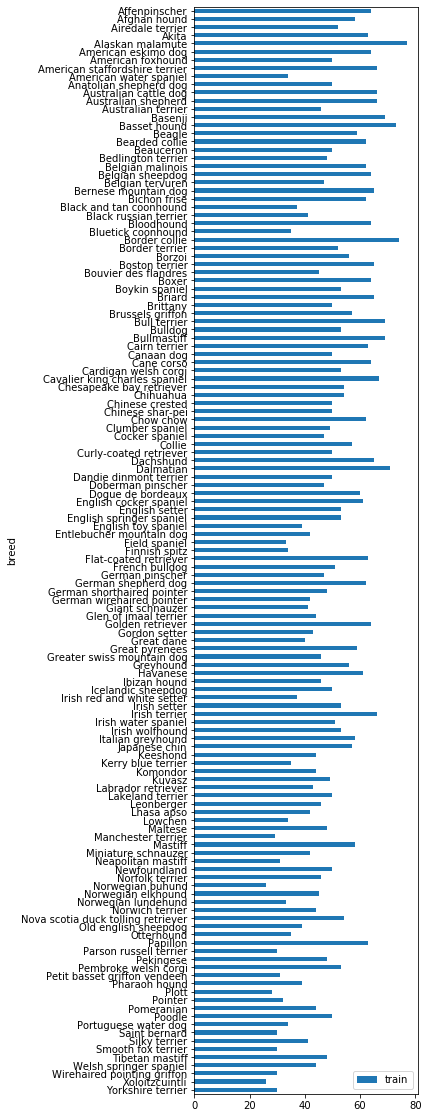

In [197]:
#dog_grouped.plot( y=['train', 'test', 'valid'], kind='barh', figsize=(5,18));
dog_grouped.sort_values('breed', ascending=False).plot( y='train', kind='barh', figsize=(4,20));

In [215]:
import os

df_dog_sizes = pd.DataFrame(data=dog_files, columns=['path'])
df_dog_sizes['size'] = np.nan
df_dog_sizes['width'] = np.nan
df_dog_sizes['height'] = np.nan

for idx, row in df_dog_sizes.iterrows():
    siz = os.path.getsize(row['path'])
    im = Image.open(row['path'])
    width, height = im.size
    df_dog_sizes.loc[idx, ['size']] = siz/1024  # kB
    df_dog_sizes.loc[idx, ['width']] = width    # Pixel
    df_dog_sizes.loc[idx, ['height']] = height  # Pixel

df_dog_sizes

,path,size,width,height
0,./data/dog_images\test\001.Affenpinscher\Affen...,36.115234,314.0,320.0
1,./data/dog_images\test\001.Affenpinscher\Affen...,77.551758,406.0,450.0
2,./data/dog_images\test\001.Affenpinscher\Affen...,33.292969,300.0,380.0
3,./data/dog_images\test\001.Affenpinscher\Affen...,55.595703,500.0,500.0
4,./data/dog_images\test\001.Affenpinscher\Affen...,54.905273,375.0,500.0
...,...,...,...,...
8346,./data/dog_images\valid\132.Xoloitzcuintli\Xol...,53.903320,600.0,449.0
8347,./data/dog_images\valid\133.Yorkshire_terrier\...,212.738281,640.0,427.0
8348,./data/dog_images\valid\133.Yorkshire_terrier\...,188.534180,640.0,425.0
8349,./data/dog_images\valid\133.Yorkshire_terrier\...,150.416992,500.0,300.0


In [216]:
df_dog_sizes.width = df_dog_sizes.width.astype('int')
df_dog_sizes.height = df_dog_sizes.height.astype('int')
df_dog_sizes['ratio'] = df_dog_sizes.width / df_dog_sizes.height

In [240]:
df_dog_sizes.sort_values('size', ascending=False).head()
#df_dog_sizes

,path,size,width,height,ratio
1129,./data/dog_images\train\005.Alaskan_malamute\A...,7215.891602,3014,2386,1.263202
7735,./data/dog_images\valid\032.Boston_terrier\Bos...,5886.045898,2448,3264,0.750000
5175,./data/dog_images\train\079.Great_pyrenees\Gre...,5783.901367,4278,3744,1.142628
7236,./data/dog_images\train\125.Portuguese_water_d...,5691.320312,3872,2592,1.493827
5209,./data/dog_images\train\080.Greater_swiss_moun...,5658.133789,2816,2112,1.333333


In [219]:
dog_files[1129]  # rauswerfen

'./data/dog_images\\train\\005.Alaskan_malamute\\Alaskan_malamute_00366.jpg'

In [220]:
dog_files[7735]

'./data/dog_images\\valid\\032.Boston_terrier\\Boston_terrier_02261.jpg'

In [241]:
df_dog_sizes.sort_values('ratio', ascending=False).head()

,path,size,width,height,ratio
672,./data/dog_images\test\099.Lhasa_apso\Lhasa_ap...,93.554688,900,314,2.866242
6166,./data/dog_images\train\099.Lhasa_apso\Lhasa_a...,94.442383,1000,401,2.493766
6692,./data/dog_images\train\112.Nova_scotia_duck_t...,242.827148,2194,894,2.454139
387,./data/dog_images\test\054.Collie\Collie_03819...,22.754883,664,290,2.289655
7504,./data/dog_images\train\133.Yorkshire_terrier\...,117.726562,500,243,2.057613


In [239]:
dog_files[672]  # rauswerfen

'./data/dog_images\\test\\099.Lhasa_apso\\Lhasa_apso_06668.jpg'

In [242]:
df_dog_sizes.sort_values('ratio', ascending=True).head()

,path,size,width,height,ratio
1977,./data/dog_images\train\020.Belgian_malinois\B...,31.537109,190,479,0.396660
3886,./data/dog_images\train\054.Collie\Collie_0381...,304.877930,1412,3408,0.414319
6001,./data/dog_images\train\096.Labrador_retriever...,662.363281,640,1534,0.417210
4841,./data/dog_images\train\072.German_shorthaired...,53.491211,280,640,0.437500
6403,./data/dog_images\train\105.Neapolitan_mastiff...,82.213867,216,475,0.454737


In [243]:
dog_files[1977]  # rauswerfen

'./data/dog_images\\train\\020.Belgian_malinois\\Belgian_malinois_01426.jpg'

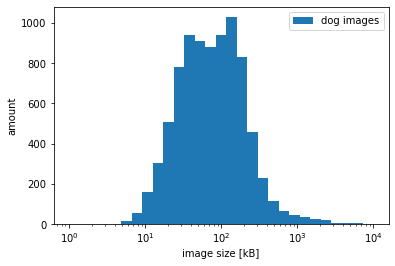

In [236]:
ax = df_dog_sizes.plot(y='size', kind='hist', label='dog images', 
                       bins=np.logspace(np.log10(1),np.log10(10000), 30));
ax.set_xscale("log");
ax.set_xlabel('image size [kB]');
ax.set_ylabel('amount');

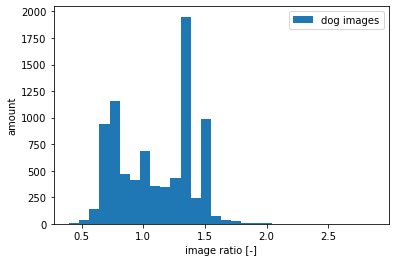

In [237]:
ax = df_dog_sizes.plot(y='ratio', kind='hist', label='dog images',
                       bins=30);
ax.set_xlabel('image ratio [-]');
ax.set_ylabel('amount');